# Шпаргалка
Перед удалением:  
посчитать число строк с пропусками  
посчитать общее число строк
сделать бэкап

 # О чём этот модуль и его структура 
Мы подошли к feature engineering - здесь мы будем более глубоко исследовать те данные, которые мы загрузили и слегка почистили в модуле B4.  

Сначала мы закончим чистку, так как в данных остались пропуски и дубли.  

Дубли обычно не несут никакой информации, поэтому мы от них избавимся. С пропусками ситуация серьезнее: они означают, что мы владеем неполной информацией, и их нужно как-то обрабатывать. Например, большинство алгоритмов машинного обучения просто не работают с пропусками. Если вы подадите на вход такому алгоритму данные с пропусками - он упадет с ошибкой. Есть несколько способов обработки пропусков, их мы и рассмотрим в этом модуле. 

После этого мы разберемся с признаком, который хранит время. Вы уже знаете, как в pandas преобразовывать строку со временем в специальный формат. Мы изучим подробнее, как работать со временем и извлекать из него интересные элементы.

Мы также научимся использовать фильтры и методы для агрегации, чтобы создать абсолютно новые признаки из имеющихся данных - это и есть настоящий feature engineering.

Еще один способ исследовать данные - группировать их и затем исследовать каждую группу отдельно. Для этого мы используем groupby и посмотрим, какую новую информацию дадут нам обобщённые данные.

В конце мы закрепим новые знания с помощью финального упражнения и подведем итоги.

В этом модуле мы глубже погрузимся в pandas.

Инструменты, которые вы изучите, помогут вам в дальнейшем работать с табличными данными любой сложности.

По итогам модуля вы сможете:
- удалять пропуски и дубли в данных  
- работать с датами и извлекать из них признаки
- заполнять пропуски константой или с помощью произвольной функции
- создавать новые признаки на основе предыдущих
- применять к признакам методы подсчета статистик (например, среднего)
- собирать разрозненные данные в единый датасет (при условии, что у них есть общие признаки)
- группировать данные по какому-либо признаку и анализировать их

Вы изучите (или вспомните) следующие функции:
- isna(), dropna(), fillna()
- drop_duplicates();
- to_datetime()
- mean(), median(), sum()
- value_counts()
- merge()
- groupby()

Так как внутри себя pandas использует numpy, многие методы numpy работают с pandas. Самый простой пример - вычисление статистик, например, среднего, с помощью метода mean().

Что можно почитать:

Документация pandas (https://pandas.pydata.org/pandas-docs/stable/)

Гайд по pandas на analyticsvidhya.com ( https://www.analyticsvidhya.com/blog/2015/04/comprehensive-guide-data-exploration-sas-using-python-numpy-scipy-matplotlib-pandas/)(советуем посмотреть и другие вещи на этом сайте)  
Конечно же, stackoverflow.com

Зачем вообще нам нужен feature engineering?
Когда мы работаем с данными, мы часто хотим построить предиктивные модели - алгоритмы, которые осуществляют то или иное предсказание исходя из данных.

Например, у нас есть данные о погоде за прошлые 100 лет. Мы хотим предсказать погоду на завтра. Что мы делаем? Строим модель, которая предсказывает погоду по входящим данным. 

Но иногда данных бывает недостаточно или они бывают плохие (на самом деле, данные всегда плохие, запомните это). В этом случае нужно прибегать к очистке данных и созданию новых признаков. 

Именно об этом будет модуль feature engineering. После его прохождения вы станете на один шаг ближе к профессии Data Scientist.

# О данных
## Что мы сделали с данными?
Итак, возвращаемся к нашему другу Коле и его данным по букмекерской конторе.  

Коля хочет расширять бизнес и увеличивать прибыль, и мы поможем ему с помощью аналитических навыков и знания нужных инструментов. Работать будем с теми же данными - log.csv и users.csv.

Что мы уже сделали?  
- Загрузили данные (и побороли ошибки, связанные с плохим форматом данных).
- Дали признакам (колонкам) соответствующие имена.
- Научились фильтровать данные и применять к ним apply.
- Обнаружили часть ошибок в данных.

Какие вопросы остались?  
Вспомним часть вопросов из прошедшего модуля.  
- Сколько раз человеку надо прийти, чтобы сделать ставку?
- Каков средний выигрыш в процентах?
- Каков баланс по каждому пользователю?
- Какие города самые выгодные?
- В каких городах самая высокая ставка?
- Сколько в среднем времени проходит от первого посещения сайта до первой попытки?

Мы постараемся ответить не только на эти, но и на многие другие вопросы.
Давайте приступим!

# 12.1 Пропущенные значения
Что такое пропущенные значения
Аналитикам часто приходится работать с данными, в которых есть пропуски. Более того, в реальных данных пропуски сплошь и рядом.

Когда могут появиться пропуски в данных? Например, если мы делаем опрос, люди могут просто не ответить на какие-то из вопросов. В этих местах появляется пропуск. Еще один пример — отправляем данные по протоколу UDP, часть данных теряется — снова пропуски. Ну и самый банальный случай — программа заглючила и не записала часть данных :).

Чтобы программа правильно интерпретировала пропуски, при чтении файла с помощью метода read_csv можно передать в параметр na_values значение или список значений, которые при чтении будут помечены как пропуски.

Какие бывают пропуски
Вот список значений, которые по умолчанию считаются как пропуски: '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null'.  

Посмотрите внимательно на список значений выше: можно заметить, что первым значением в списке является пустая строка '' - это именно тот случай, когда значения в данных просто нет.

Почему так много значений считаются пропусками? Ответ уходит корнями в прошлое, но если кратко, то:
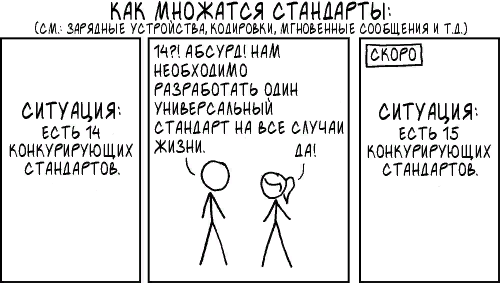

Еще немного информации об этом можно найти по ссылкам:

Ссылка на документацию (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
Ответ на stackoverflow, который немного проясняет ситуацию (https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas)(но не так сильно, как картинка выше)
Ещё один ответ (https://stackoverflow.com/questions/26659941/pandas-read-csv-named-argument-na-values-default-values)
На практике чаще всего вы будете встречать '', 'NaN', 'nan', 'null'

# Как найти пропуски
В pandas есть метод isna(), который возвращает таблицу такой же размерности, что и на вход, но значения в ней - True или False. True, если данное значение является пропуском, и False в ином случае.

log.head().isna()  
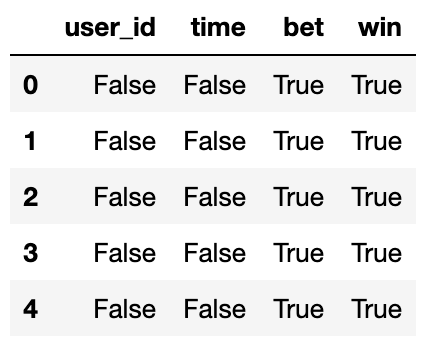

Зачем нам смотреть на эту таблицу? На самом деле, незачем, но с помощью нее можно делать полезные вещи. Например, считать количество пропусков и работать с ними, чем мы и займемся дальше.

В numpy пропущенные значения могут быть записаны как специальный объект np.nan, что означает Not a Number.

Проверить на наличие таких значений можно с помощью np.isnan().

P.S. Если вы все-таки хотите посмотреть на красивую (и, возможно, полезную) визуализацию пропущенных значений - обратите внимание на библиотеку missingno(https://github.com/ResidentMario/missingno).

In [31]:
import pandas as pd
pd.set_option('display.max_rows', 20)

# прочитаем файл в переменную log;
log = pd.read_csv('log.csv', header=None)
# добавим названия колонок user_id, time, bet, win;
log.columns = ['user_id','time','bet','win']
# уберём лишний первый символ в time
log.time = log.time.apply(lambda t: str(t)[1:] if (isinstance(t, str)) else t)
# избавимся от пропусков
log = log.drop_duplicates()

display(log)

,user_id,time,bet,win
0,Запись пользователя № - user_919,2019-01-01 14:06:51,NaN,NaN
1,Запись пользователя № - user_973,2019-01-01 14:51:16,NaN,NaN
2,Запись пользователя № - user_903,2019-01-01 16:31:16,NaN,NaN
3,Запись пользователя № - user_954,2019-01-01 17:17:51,NaN,NaN
4,Запись пользователя № - user_954,2019-01-01 21:31:18,NaN,NaN
...,...,...,...,...
994,Запись пользователя № - user_977,2019-04-20 18:10:07,10354.0,NaN
995,Запись пользователя № - user_984,2019-04-20 9:59:58,9754.0,NaN
996,#error,NaN,10054.0,29265.0
997,#error,NaN,10454.0,NaN


# Задание 1
Посчитайте количество пропусков в столбце time. Метод isna() есть не только у DataFrame, но и у Series. Это значит, что применять его можно не только ко всей таблице, но и к каждому столбцу отдельно.
Примените этот метод, затем просуммируйте количество строк в итоговом столбце.

In [2]:
omissions = list(filter(lambda x: x is True, log.time.isna()))
print(sum(omissions))

12


# Удаление пропусков
Пропуски можно удалять автоматически. Во многих случаях это правильно, так как данные с большим количеством пропусков часто не имеют смысла и не приносят никакой пользы.  

Удалять данные с пропусками можно с помощью метода dropna().

Параметр axis в методе dropna() говорит методу, по какой оси удалять значения.  

Если нужно удалить строки, в которых встречается пропуск (NaN), следует указать axis=0.  Зачем это делать? Например, у нас из 1000 примеров данных про пользователей пропуски есть в пяти. Разумно их удалить, так как их количество пренебрежимо мало.
Если нужно удалить столбцы, в которых встречается пропуск (NaN), нужно указывать axis=1. Зачем? Иногда в одном конкретном столбце пропусков настолько много, что с ними просто не хочется возиться - смысла в них все равно почти нет.  

Еще один интересный параметр - subset. Что он делает? Если передать в него список значений по одной оси (например, названия столбцов) и задать при этом в параметре axis другую ось (в нашем случае 0), то мы удалим те строки, для которых в данных столбцах находится пропуск. То же самое работает и наоборот: нужно поменять axis на 1 и вместо названий столбцов передавать индексы строк.

Перед удалением строк обязательно сделайте бэкап.

# Задание 2
Удалите все столбцы, где есть пропуски. Запишите в поле, сколько осталось столбцов в данных после этого.  
Используйте оригинальный датасет log.csv.

In [3]:
log2 = log.copy()
log2 = log2.dropna(axis=1)
print(len(log2.columns))

1


# Задание 3
Удалите все строки, где есть пропуски. Запишите в поле, сколько осталось строк в данных после этого.  
Используйте оригинальный датасет log.csv.

In [4]:
log3 = log.copy()
log3 = log3.dropna()
print(log3.count()[0])

133


# Задание 4
Используйте оригинальный датасет log.csv.

С данными в столбцах bet и win мы разберемся позже: пропуски в этих столбцах требуют особого подхода.

А сейчас:

если есть пропуски в столбце user_id - удалите столбец user_id,

если есть пропуски в столбце time - удалите столбец time.

Запишите в поле ответа, количество оставшихся столбцов в данных, после этих действий.

In [5]:
# если есть пропуски в столбце user_id - удалите столбец user_id
log4 = log.copy()
if True in list(log4.user_id.isna()):
    log4 = log4.drop(['user_id'], axis=1)

# # если есть пропуски в столбце time - удалите столбец time.
if True in list(log4.time.isna()):
    log4 = log4.drop(['time'], axis=1)

display(len(log4.columns))

3

# Задание 5
К каким объектам можно применять метод isna()?

- Строки в pd.DataFrame
- Массивы numpy (np.array, np.ndarray)
- Таблицы в pandas (pd.DataFrame)
- Столбцы в pd.DataFrame
- Строки в Python (строковый тип данных, str)
- Пропуски в numpy (np.nan)

Ответ: 
- Строки в pd.DataFrame
- Таблицы в pandas (pd.DataFrame)
- Столбцы в pd.DataFrame

# 12.2. Дубли
Дубли - это повторяющиеся строки в данных. В сложных случаях строки могут быть практически одинаковые, но не совсем.

Самая частая причина очень банальна: дубли появляются из-за человеческих ошибок или невнимательности.

Например, при добавлении записи в систему вы случайно два раза нажали на кнопку "добавить". Если система позволяет иметь одинаковые записи, поздравляю - у вас в данных появились дубли.

Еще одна причина - слияние баз данных. Например, вы переносите телефоны из контактной книжки (физической, в которую заносили номера ручкой на бумагу, такие были популярны в прошлом) в телефон. Назвали в одном месте Сашу Сашей, а в другом Александром. Да, это тоже дубль, просто сам случай немного более сложный.

Сложным случаям типа последнего можно посвятить очень много времени, так что это материал для другого, более продвинутого курса по анализу данных. Скажу лишь, что в каждом конкретном случае подозрительные случаи нужно рассматривать отдельно, это требует кропотливой работы. 

Мы же рассмотрим простой случай, когда у вас в данных есть идентичные строки.

Как удалить простые дубли
В pandas есть метод для удаления дублей (дубликатов) - drop_duplicates(). Он просто удаляет повторяющиеся строки:

import pandas as pd  
df = pd.read_csv('data.csv')
df.drop_duplicates()  
У данного метода тоже есть параметр subset, в этом случае нужно передавать список содержащий названия столбцов.  

Задание 1  
Удалите дубли среди столбцов user_id и time. Запишите в поле ниже, сколько осталось строк после удаления дублей.

In [6]:
log = log.drop_duplicates(subset=['user_id', 'time'])
print(log.count()[0])

986


Задание 2
В каких случаях мы точно можем сказать, что перед нами дубли?
Отдельные примеры заключены в кавычки.

- "Мама мыла раму" и "Мама мыла кошку"
- "Иван Иванов Алексеевич" и "Иванов Иван Алексеевич"
- "База данных 1" и "База данных 1"
- "Удачи" и "удача"

Ответ:
- "База данных 1" и "База данных 1"

# 12.3 Преобразование к datetime
Преобразование к datetime
Вспомним прошлый модуль по очистке данных: признак time был слегка испорчен, в начале каждой даты стоял лишний символ [, вы его убрали.  

Для преобразования столбца с датой в виде текста в дату формата datatime, необходимо использовать метод to_datetime() в библиотеке pandas.

Внутрь метода нужно передать тот столбец, который требуется преобразовать.

Компьютеры понимают числа, но не понимают текст (хотя представители профессии Data Scientist найдут, что сказать по этому поводу). Поэтому, если у вас время записано в виде строки, нужно вытащить из него числа. Таким образом можно получить очень много полезной информации в виде чисел:

- Часы, минуты, секунды.
- Год, месяц, день.
- Более сложные объекты: время дня, время года и другое.
- Если мы храним время в виде специальных объектов типа Timestamp (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html), с ним можно проводить и другие операции, например, сложение и вычитание.

Поэтому сейчас важно выполнить преобразование и продолжить работу.

Задание 1
Уберите лишний символ, преобразуйте признак time к datetime. После этого найдите наибольшую дату и выведите ее без времени.

Подсказка: можно применить метод max() к получившемуся столбцу со временем.

Не забудьте избавиться от пропусков.

Запишите ответ в формате "YYYY-MM-DD".
Например, 1993-06-08.

In [7]:
log.time = pd.to_datetime(log.time)
max_date = log.time.max()
print(max_date)

2019-04-20 18:10:07


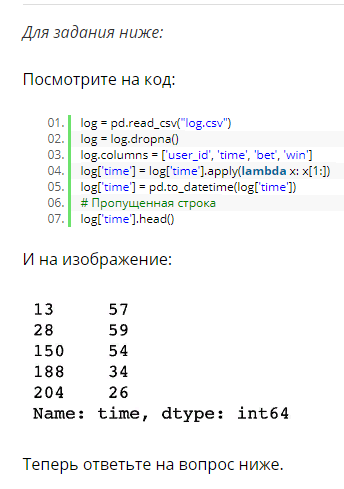

# Задание 2
Посмотрите на изображение и код выше. Какую строчку надо написать вместо пропущенной строки, чтобы получить вывод как на изображении?
Можно выбрать один или несколько ответов.

- log['time'] = log['time'].apply(lambda x: x.second)
- log['time'] = log['time'].apply(lambda x: x.minutes)
- log.time = log.time.apply(lambda x: x.minute)
- log.time = log.time.apply(lambda x: x.hour)
- log['time'] = log.time.apply(lambda x: x.minute)

Ответ:
- log.time = log.time.apply(lambda x: x.minute)
- log['time'] = log.time.apply(lambda x: x.minute)

# 12.4 Извлечение признаков времени
Извлечение признаков времени
В данном блоке мы будем использовать уже знакомые вам возможности pandas: работу со временем и преобразование столбцов.

Для начала вспомним, что мы можем делать с datetime. Вот примеры атрибутов, по которым мы можем обращаться к данным объектам:

- year: возвращает год
- month: возвращает месяц
- day: возвращает день
- hour, minute, second - час, минута, секунда
- dayofweek - день недели, от 0 до 6, где 0 - понедельник, 6 - воскресенье

Кроме них, есть и другие интересные атрибуты, советуем посмотреть здесь(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html).

Ранее в курсе вы разбирали метод apply(). Он позволяет применить определенную функцию к каждому элементу в столбце.

В метод apply() можно передавать обычные и lambda-функции.

Например, если мы хотим получить столбец, в котором каждым значением будет год из другого столбца (это и есть feature engineering - создание новых признаков из старых), мы можем сделать следующее:

**year_column = log['time'].apply(lambda x: x.year)**

Библиотека pandas позволяет использовать аксессор dt для упрощения подобной работы:

**year_column = log['time'].dt.year**

Аксессор - это атрибут столбца, который хранит переменные типа Timestamp, то есть переменные, которые были строковым представлением времени, а затем изменены с помощью pd.to_datetime(). Если вы попытаетесь обратиться к dt у столбца, в котором лежит что-то отличное от времени, вы получите ошибку.

Чуть больше можно увидеть здесь (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html)(не забудьте посмотреть в исходный код).

Вы можете пользоваться любым из предложенных выше способов. 

Одним из часто используемых методов в pandas является value_counts().

Этот метод возвращает Series, который содержит количества уникальных элементов.

Например, если мы выполним следующий код:

**test = pd.Series([1, 1, 1, 2, 3, 4, 4])**  
**test.value_counts()**

То получим:

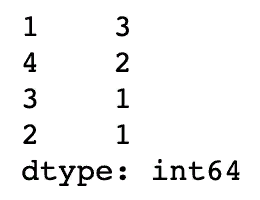

Это значит, что число 1 встретилось 3 раза, число 4 встретилось 2 раза, а числа 2 и 3 встретились по одному разу.

value_counts() возвращает значения отсортированными по убыванию.

Если в value_counts() передать значение параметра ascending=True, метод вернет значения, отсортированные по возрастанию.

# Задание 1
Используйте оригинальные данные log.csv, столбец time.

Подсказка: можно использовать value_counts().

Найдите минуту, которая встречалась в данных чаще всего. Введите ответ в поле ниже.

In [8]:
most_minute = log.time.dt.minute
most_minute = most_minute.value_counts().index[0]
display(most_minute)

36.0

# Задание 2
Используйте оригинальные данные log.csv, столбец time.

Подсказка: можно использовать value_counts().

Найдите месяц, который встречался в данных реже всего. Введите ответ в поле ниже.

In [9]:
rare = log.time.dt.month
rare = rare.value_counts(ascending=True).index[0]
display(rare)

4.0

Просто, не так ли?

В реальности мы используем эти же методы для получения более интересных вещей из данных.

Новые интересные знания, которые получаются из данных, мы называем инсайтами (insights).

Следующие пара заданий позволят нам получить результаты, которые можно называть инсайтами и которые могут принести реальную пользу.

# Задание 3*
Используйте оригинальные данные log.csv, столбец time.

Подсказка: можно использовать sum().

Посчитайте, сколько дней в данных являются выходными (то есть субботой или воскресеньем). Введите ответ в поле ниже.
Например, 300.

In [10]:
count_weekends = list(filter(lambda x: x == 'Saturday' or x == 'Sunday' , list(log.time.dt.day_name())))

display(len(count_weekends))

283

# Задание 4*
Используйте оригинальные данные log.csv, столбец time.

Подсказка: можно использовать value_counts(). Кроме этого, потребуется написать функцию, которая преобразует дату во время дня.

Договоримся, что с 0 до 5 часов - ночь, с 6 до 11 - утро, с 12 до 17 - день, с 18 до 23 - вечер.

Важно: для выполнения задания вам нужно будет избавиться от пропусков только в столбце time. Вспомните, как избавиться от пропусков только по конкретному признаку.

Посчитайте, какое время дня встречается в данных реже всего. Введите ответ в поле ниже: ночь, утро, день или вечер.
Например, ночь.

In [30]:
def time_of_day(hour):
    if hour <= 5:
        return 'ночь'
    elif hour > 5 and hour <= 11:
        return 'утро'
    elif hour > 11 and hour <= 17:
        return 'день'
    else:
        return 'вечер'

count_td = log.time.dt.hour.apply(time_of_day)

print(count_td.value_counts().index[-1])

вечер


# Задание 5*
Давайте повторим то, что мы прошли в этой секции. Напишите код, который создаст признак hour из признака time в датасете log.csv. Для этого:

1. загрузите датасет log.csv в переменную log, дальше работать будем с ней;

2. установите имена столбцов: ['user_id', 'time', 'bet', 'win'];

3. избавьтесь от пропусков в log;

4. приведите переменную time к подходящему для извлечения признаков виду;

5. получите значение часа для каждой строки в переменной time и запишите в столбец hour в log.

Результатом будет таблица log со столбцом hour внутри.

In [34]:
import pandas as pd

# прочитаем файл в переменную log;
log = pd.read_csv('log.csv', header=None)
# добавим названия колонок user_id, time, bet, win;
log.columns = ['user_id','time','bet','win']
# уберём лишний первый символ в time
log.time = log.time.apply(lambda t: str(t)[1:] if (isinstance(t, str)) else t)
# избавимся от пропусков
log = log.drop_duplicates()

log.time = pd.to_datetime(log.time)

log['hour'] = log.time.dt.hour
display(log)

,user_id,time,bet,win,hour
0,Запись пользователя № - user_919,2019-01-01 14:06:51,NaN,NaN,14.0
1,Запись пользователя № - user_973,2019-01-01 14:51:16,NaN,NaN,14.0
2,Запись пользователя № - user_903,2019-01-01 16:31:16,NaN,NaN,16.0
3,Запись пользователя № - user_954,2019-01-01 17:17:51,NaN,NaN,17.0
4,Запись пользователя № - user_954,2019-01-01 21:31:18,NaN,NaN,21.0
...,...,...,...,...,...
994,Запись пользователя № - user_977,2019-04-20 18:10:07,10354.0,NaN,18.0
995,Запись пользователя № - user_984,2019-04-20 09:59:58,9754.0,NaN,9.0
996,#error,NaT,10054.0,29265.0,NaN
997,#error,NaT,10454.0,NaN,NaN


# 12.5 Снова смотрим на пропуски
## Еще немного о пропусках
Ранее мы говорили о пропусках - местах в данных, где по какой-то причине ничего нет.

Что мы делали с пропусками? Удаляли их.

На самом деле, удаление пропусков - довольно грубое решение, потому что мы можем случайно выбросить что-то полезное. Например, у вас есть данные о людях: пол, возраст, цвет глаз, город. При этом для большинства людей не записан цвет глаз. Удалять строки с пропусками может быть неудачным решением -  у нас почти не останется данных. Удалить столбец с цветом глаз - решение получше. Возможно, есть решение еще лучше - например, заполнить все пропуски цветом глаз "карие". Ответ на вопрос "Правильно ли будет так сделать?" можно получить после уточнения информации: в каких-то странах преобладает один цвет глаз, в каких-то - другой.

Поэтому довольно часто можно заполнить пропуски, сделав некоторые обоснованные предположения.

Сейчас мы познакомимся с самым простым способом заполнять пропуски - заполнением константой.

каждый пропуск в столбце мы заполним одним и тем же числом.

Почему мы вообще говорим о заполнении пропусков вместо того, чтобы просто удалить их? Потому что после удаления пропусков у нас останется слишком мало данных, а нам хочется получить какие-то инсайты из них.

Заполнение константой
Что такое константа? Это просто число.

Посмотрим на признак bet в наших данных (log.csv).

"Bet" означает "ставка".  Некоторые значения в данных заполнены цифрами - поэтому мы можем сделать предположение, что это сумма в рублях, т.е. ставка. 

Можно также предположить, что если в данных в этом месте пропуск - значит, человек не делал ставку. Другими словами, ставка в данном случае равна 0.

Чтобы заполнить пропуски в столбце каким-то значением, можно использовать метод fillna() у самого столбца. Аргументом этого метода будет число, которое появится на месте пропусков.

Например:

- log['bet'].fillna(0)  

В задании ниже вы заполните пропуски нулями. Почему бы просто не удалить строки с пропусками?

Дело в том, что в данном случае, скорее всего ,пропуски что-то означают. А именно, они означают (по крайней мере, мы это предполагаем), что человек приходил, но не делал ставку. Иначе говоря, ставка человека в этом случае равна 0.

Если мы удалим все строки с пропусками, останутся только строки, где ставка положительная. Это было бы нелогично, так как получится, что каждый пришедший в букмекерскую контору человек делает ставку. Иногда люди заходят просто посмотреть :)

# Задание 1

Используйте оригинальный датасет log.csv. Результат запишите числом в поле ниже.

Подсказка: можно использовать value_counts().

Посчитайте, сколько раз люди приходили, но не делали ставок. Для этого заполните пропуски в столбце bet значением 0 и посчитайте количество таких значений.
Например, 66.

In [13]:
import pandas as pd

# прочитаем файл в переменную log;
log = pd.read_csv('log.csv', header=None)
# добавим названия колонок user_id, time, bet, win;
log.columns = ['user_id','time','bet','win']
# уберём лишний первый символ в time
log.time = log.time.apply(lambda t: str(t)[1:] if (isinstance(t, str)) else t)
# приводим к формату datetime
log.time = pd.to_datetime(log.time)

# заполняем пропуски в bet нулями
log.bet = log.bet.fillna(0)

display(log.bet.value_counts()[0])

515

Заполнение с помощью функции
Теперь поработаем с признаком win, в котором тоже есть пропуски.

Иногда нужно заполнять пропуски не одним и тем же числом, а разными, в зависимости от какого-то условия. Перед нами именно этот случай.

Предположим, что если в признаке win находится пропуск, то выигрыша не было. Здесь два возможных случая:

Человек не делал ставки и ничего не выиграл. То есть просто пришел, посмотрел и ушел.
Человек делал ставку, но не выиграл. Значит, выигрыш на самом деле является отрицательным значением - это проигрыш.
Предлагаем вам написать метод, который заполнит пропуски в признаке win в соответствии с предположением выше. 

Для этого можно применить метод apply() ко всей таблице и передать ему функцию, которая вычисляет размер выигрыша (или проигрыша) по следующей схеме:

Если значение в столбце win существует (не пропуск) - вернуть это же значение. Это значит, что человек выиграл.
Если вместо значения в столбце win и в столбце bet пропуски, вернуть 0.
Если в столбце bet нет пропуска, а в столбце win есть пропуск, вернуть отрицательное значение столбца bet (проигрыш).
на выходе получится таблица без пропусков в столбце win. Следующим шагом будет замена старого столбца win на новый.

- Выглядеть это будет примерно так:

def fillna_win(row):  
    # Нужно дописать  
  
- Применяем функцию  

new_win = log.apply(lambda row: fillna_win(row), axis=1)  
  
- Заменяем старый столбец с пропусками на новый без пропусков  

log['win'] = new_win

# Задание 2

Используйте оригинальный датасет log.csv. Проделайте с ним действия из задания 1, расположенного выше на этой странице, и из пункта "Заполнение с помощью функции".

Результат запишите числом в поле ниже.

Подсказка: можно использовать sum().

Посчитайте, сколько раз участники ставок проиграли деньги. То есть посчитайте количество строк, для которых в столбце win находится отрицательное значение.
Например, 616.

In [32]:
import pandas as pd
import numpy as np

# прочитаем файл в переменную log;
log = pd.read_csv('log.csv', header=None)
# добавим названия колонок user_id, time, bet, win;
log.columns = ['user_id','time','bet','win']
# уберём лишний первый символ в time
log.time = log.time.apply(lambda t: str(t)[1:] if (isinstance(t, str)) else t)
# приводим к формату datetime
log.time = pd.to_datetime(log.time)

def fillna_win(row):
    bet_nan = np.isnan(row.bet)
    win_nan = np.isnan(row.win)
    
    if not bet_nan and win_nan:
        return -row.bet
    elif not bet_nan and not win_nan:
        return row.win
    else:
        return 0


# Применяем функцию
log.win = log.apply(lambda row: fillna_win(row), axis=1)
count = list(filter(lambda x: x < 0, log.win))
print(len(count))


347


# 12.6 Есть ли смысл играть?
## Что еще можно сделать
В прошлой секции мы обратились к предобработке пропусков и поработали над признаками bet и win.

Теперь мы создадим новый признак на их основе и будем с ним работать.

Напомним, что добавить новый столбец (признак) в pandas очень просто: нужно обратиться к нему по имени и присвоить значение.

- log['net'] = # здесь должен быть код, создающий новый признак  
Кроме этого, в pandas (как и в numpy) столбцы можно складывать друг с другом поэлементно.

# Задание 1
Используйте модифицированный в прошлой секции датасет log.csv. Результат запишите числом в поле ниже.

Подсказка: можно использовать sum().

Создайте признак net, хранящий сумму выигрыша с учетом ставки. Для этого используйте следующий алгоритм:
- если значение признака win меньше 0 - присвоить значение признака win признаку net;

- во всех остальных случаях - из значения признака win вычтите значение признака bet и полученное значение присвойте признаку net.

После этого посчитайте, у скольких людей выигрыш положительный.  
Например, 0.

In [5]:
import pandas as pd
import numpy as np

# прочитаем файл в переменную log;
log = pd.read_csv('log.csv', header=None)
# добавим названия колонок user_id, time, bet, win;
log.columns = ['user_id','time','bet','win']
# уберём лишний первый символ в time
log.time = log.time.apply(lambda t: str(t)[1:] if (isinstance(t, str)) else t)
# приводим к формату datetime
log.time = pd.to_datetime(log.time)

def fillna_win(row):
    bet_nan = np.isnan(row.bet) or row.bet == 0
    win_nan = np.isnan(row.win)
    
    if not bet_nan and win_nan:
        return -row.bet
    elif not bet_nan and not win_nan:
        return row.win
    else:
        return 0

def fill_net(row):
    win = row.win
    bet = row.bet
    if win < 0:
        return win 
    return win - bet


# заполняем пропуски в bet нулями
log.bet = log.bet.fillna(0)
# 
log.win = log.apply(lambda row: fillna_win(row), axis=1)

# Применяем функцию
log['net'] = log.apply(lambda row: fill_net(row), axis=1)

count = list(filter(lambda x: x > 0, log.net))
print(len(count))


138


Задание 2
1 point possible (graded)
Используйте датасет log.csv, получившийся в результате выполнения предыдущего задания. Посчитайте среднее значение выигрыша (из столбца net) в тех случаях, когда выигрыш больше 0. Результат округлите до целого, отбросив дробную часть.

Подсказка: можно использовать mean().

In [10]:
mean_net = pd.Series(list(filter(lambda x: x > 0, log.net))).mean()
print(round(mean_net))


80253


Задание 3
1 point possible (graded)
Используйте датасет log.csv, получившийся в результате выполнения первого задания этого блока. Посчитайте медианное значение выигрыша (из столбца net) в тех случаях, когда выигрыш больше 0. Результат округлите до целого, отбросив дробную часть.

Подсказка: можно использовать median().

In [11]:
median_net = pd.Series(list(filter(lambda x: x > 0, log.net))).median()
print(round(median_net))

5347


Подумайте о mean и median
Проанализируйте результаты двух предыдущих заданий.

Одинаковые получились значения или разные? Почему?

На это задание не нужно отвечать на платформе, предлагаем просто подумать.

# Задание 4
Как можно посчитать среднее значение для столбца bet, не учитывая при подсчете пропуски?

- log.bet.mean()
- log.bet.mean(skipna=False)
- pd.mean(log['bet'])
- log.bet.sum() / log.bet.dropna().shape[0]
- np.mean(log.bet)
- log['bet'].dropna().mean()

In [25]:
import pandas as pd
import numpy as np

# прочитаем файл в переменную log;
log = pd.read_csv('log.csv', header=None)
# добавим названия колонок user_id, time, bet, win;
log.columns = ['user_id','time','bet','win']
# уберём лишний первый символ в time
log.time = log.time.apply(lambda t: str(t)[1:] if (isinstance(t, str)) else t)
# приводим к формату datetime
log.time = pd.to_datetime(log.time)

print(log.bet.mean())
print(log.bet.sum() / log.bet.dropna().shape[0])
print(np.mean(log.bet))
print(log['bet'].dropna().mean())


6785.738144329897
6785.738144329897
6785.738144329897
6785.738144329897


# Ответ на Задание 4
- log.bet.mean()
- log.bet.sum() / log.bet.dropna().shape[0]
- np.mean(log.bet)
- log['bet'].dropna().mean()

# 12.7 Сколько можно выиграть/проиграть?
## Что осталось сделать
В прошлых секциях мы:

- посмотрели на ставки и выигрыши;
- создали признак net, который показывает разницу в деньгах;
- посмотрели количество людей, которые что-то заработали;
- посчитали пару статистик на основе этих данных и даже подумали о их смысле.

Теперь мы посмотрим, сколько в среднем люди выигрывают и проигрывают.

Задание 1
1 point possible (graded)
Используйте модифицированный датасет log.csv.

При модификации датасета log.csv, пропущенные значения в столбцах bet и win замените на 0, cоздайте столбец net, хранящий сумму выигрыша с учетом ставки (для этого из столбца win поэлементно вычтите столбец bet и запишите в новый столбец).

Посчитайте, какой процент посещений букмекерской конторы оборачивался ставкой. Для этого поделите количество ставок (значений больше 0) на общее количество посещений конторы. Результат округлите до одного знака после запятой.

Задание 2
1 point possible (graded)
Используйте датасет log.csv, получившийся в результате модификации при выполнении первого задания этого блока.

Посчитайте среднее значение ставки (из столбца bet) в тех случаях, когда ставка была сделана. Запишите результат, отбросив дробную часть.
Подсказка: можно использовать mean().

Задание 3
1 point possible (graded)
Используйте датасет log.csv, получившийся в результате модификации при выполнении первого задания этого блока.

Посчитайте средний выигрыш (из столбца net) в тех случаях, когда ставка была сделана. В ответ запишите полученное число с отброшенной дробной частью.
Пояснение: выигрыш в данном случае означает изменение количества денег и может быть отрицательным. В таком случае это проигрыш.

Подсказка: можно использовать mean().

Задание 4
1 point possible (graded)
Используйте датасет log.csv, получившийся в результате модификации при выполнении первого задания этого блока.

Посчитайте среднее значение потерь при проигрыше (из столбца net). Результат округлите до целого, отбросив дробную часть.
Пояснение: ответ должен быть дан в виде отрицательного числа.

Подсказка: можно использовать mean().

Задание 5
1 point possible (graded)
Посчитайте, какой процент ставок заканчивается выигрышем, а какой - проигрышем. Сравните эти значения и ответьте, какое из них больше.

Выберите пункт из списка ниже.
Выигрыш
Проигрыш
Примерно одинаково

Задание 6*
1 point possible (graded)
Давайте повторим то, что мы прошли в этой секции. Напишите код, который узнает, чему была равна минимальная ставка и сколько людей сделали такую ставку. Для этого:

1. загрузите датасет log.csv;

2. посчитайте, чему равна минимальная ставка;

3. посчитайте, сколько раз была сделана минимальная ставка, и запишите результат в переменную min_bet_amount в виде целого числа.

# 12.7 Сколько можно выиграть/проиграть?
Что осталось сделать
В прошлых секциях мы:

- посмотрели на ставки и выигрыши;
- создали признак net, который показывает разницу в деньгах;
- посмотрели количество людей, которые что-то заработали;
- посчитали пару статистик на основе этих данных и даже подумали о их смысле.

Теперь мы посмотрим, сколько в среднем люди выигрывают и проигрывают.

In [2]:
import pandas as pd
import numpy as np

# прочитаем файл в переменную log;
log = pd.read_csv('log.csv', header=None)
# добавим названия колонок user_id, time, bet, win;
log.columns = ['user_id','time','bet','win']
# уберём лишний первый символ в time
log.time = log.time.apply(lambda t: str(t)[1:] if (isinstance(t, str)) else t)
# приводим к формату datetime
log.time = pd.to_datetime(log.time)

def fill_net(row):
    win = row.win
    bet = row.bet 
    return win - bet


# заполняем пропуски в bet нулями
log.bet = log.bet.fillna(0)
# заполняем пропуски в win нулями
log.win = log.win.fillna(0)

# создаём столбец net на основе данных из bet и win
log['net'] = log.apply(lambda row: fill_net(row), axis=1)

display(log)

,user_id,time,bet,win,net
0,Запись пользователя № - user_919,2019-01-01 14:06:51,0.0,0.0,0.0
1,Запись пользователя № - user_973,2019-01-01 14:51:16,0.0,0.0,0.0
2,Запись пользователя № - user_903,2019-01-01 16:31:16,0.0,0.0,0.0
3,Запись пользователя № - user_954,2019-01-01 17:17:51,0.0,0.0,0.0
4,Запись пользователя № - user_954,2019-01-01 21:31:18,0.0,0.0,0.0
...,...,...,...,...,...
995,Запись пользователя № - user_984,2019-04-20 09:59:58,9754.0,0.0,-9754.0
996,#error,NaT,10054.0,29265.0,19211.0
997,#error,NaT,10454.0,0.0,-10454.0
998,#error,NaT,1000.0,0.0,-1000.0


# Задание 1
Используйте модифицированный датасет log.csv.

При модификации датасета log.csv, пропущенные значения в столбцах bet и win замените на 0, cоздайте столбец net, хранящий сумму выигрыша с учетом ставки (для этого из столбца win поэлементно вычтите столбец bet и запишите в новый столбец).

Посчитайте, какой процент посещений букмекерской конторы оборачивался ставкой. Для этого поделите количество ставок (значений больше 0) на общее количество посещений конторы. Результат округлите до одного знака после запятой.

In [3]:
bet_count = len(list(filter(lambda x: x > 0, list(log.bet))))
print(bet_count)
visit_count = log.user_id.count()
print(visit_count)
percent = round(bet_count/visit_count*100, 1)
print(percent)

485
1000
48.5


# Задание 2
Используйте датасет log.csv, получившийся в результате модификации при выполнении первого задания этого блока.

Посчитайте среднее значение ставки (из столбца bet) в тех случаях, когда ставка была сделана. Запишите результат, отбросив дробную часть.

Подсказка: можно использовать mean().

In [5]:
bet_mean = pd.Series(list(filter(lambda x: x > 0, list(log.bet)))).mean()
print(int(bet_mean))

6785


# Задание 3
Используйте датасет log.csv, получившийся в результате модификации при выполнении первого задания этого блока.

Посчитайте средний выигрыш (из столбца net) в тех случаях, когда ставка была сделана. В ответ запишите полученное число с отброшенной дробной частью.
Пояснение: выигрыш в данном случае означает изменение количества денег и может быть отрицательным. В таком случае это проигрыш.

Подсказка: можно использовать mean().

In [6]:
net_mean = pd.Series(list(filter(lambda x: x != 0, list(log.net)))).mean()
print(int(net_mean))

20421


# Задание 4
Используйте датасет log.csv, получившийся в результате модификации при выполнении первого задания этого блока.

Посчитайте среднее значение потерь при проигрыше (из столбца net). Результат округлите до целого, отбросив дробную часть.
Пояснение: ответ должен быть дан в виде отрицательного числа.

Подсказка: можно использовать mean().

In [7]:
loose_count = pd.Series(list(filter(lambda x: x < 0, list(log.net)))).mean()
print(int(loose_count))

-3372


# Задание 5
Посчитайте, какой процент ставок заканчивается выигрышем, а какой - проигрышем. Сравните эти значения и ответьте, какое из них больше.

Выберите пункт из списка ниже.
- Выигрыш
- Проигрыш
- Примерно одинаково

Ответ: наитупейший ответ Проигрыш, потому что в действительности процентовка примерно одинаковая

In [55]:
win_count = len(list(filter(lambda x: x > 0, list(log.bet))))
print(win_count)
loose_count = len(list(filter(lambda x: x <= 0, list(log.bet))))
print(loose_count)
visit_count = log.user_id.count()
print(visit_count)
percent_win = win_count/visit_count
percent_loose = loose_count/visit_count
print(percent_win)
print(percent_loose)

485
515
1000
0.485
0.515


# Задание 6*
Давайте повторим то, что мы прошли в этой секции. Напишите код, который узнает, чему была равна минимальная ставка и сколько людей сделали такую ставку. Для этого:

1. загрузите датасет log.csv;

2. посчитайте, чему равна минимальная ставка;

3. посчитайте, сколько раз была сделана минимальная ставка, и запишите результат в переменную min_bet_amount в виде целого числа.

In [18]:
log = pd.read_csv('log.csv', header=None)
log.columns = ['user_id','time','bet','win']

count_bet = log.bet.value_counts()
display(count_bet.index.sort_values()[0])
min_bet_amount = count_bet.index.sort_values()[0]
min_bet_amount = count_bet[min_bet_amount]

print(min_bet_amount)

100.0

48


# 12.8 Повторение merge/groupby
## Что сделали до этого
Теперь мы снова будем использовать log.csv и users.csv вместе.

Повторим часть предобработки, которую мы должны были выполнить ранее:

In [27]:
# # Приведем признак user_id к одному формату в обоих датасетах  
# us.user_id = us.user_id.apply(lambda x: x.lower())  
# # Избавимся от ошибок в user_id  
# log = log[log.user_id != '#error']  
# log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1]) 

Это будет нужно для того, чтобы объединить оба датасета и работать с едиными данными для проведения продвинутого анализа.

# Merge
Теперь объединим данные с помощью метода pd.merge():

In [29]:
# pd.merge(dataframe1, dataframe2, on='feature_name')  

Первые два аргумента - таблицы, которые нужно будет объединить.

Третий аргумент - название признака, по которому будем объединять данные. Мы уже привели данные к одинаковому виду, и теперь их можно объединить по признаку 'user_id', чтобы получить полную информацию о пользователе. 

# Задание 1
Объедините датасеты log.csv и users.csv по признаку user_id по примеру выше. Ответ запишите в поле ниже.

Запишите количество строк в получившейся таблице.

In [35]:
us = pd.read_csv('users.csv', sep='\t', encoding='KOI8-R')
us.columns = ['user_id', 'email', 'geo']

log = pd.read_csv('log.csv', header=None)
log.columns = ['user_id','time','bet','win']

# Приведем признак user_id к одному формату в обоих датасетах  
us.user_id = us.user_id.apply(lambda x: x.lower())  
# Избавимся от ошибок в user_id  
log = log[log.user_id != '#error'] 
# 
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1]) 

display(us)
display(log)

df = pd.merge(log, us, on='user_id')  
display(df)

,user_id,email,geo
0,user_943,Accumanst@gmail.com,Ижевск
1,user_908,Advismowr@mail.ru,Ижевск
2,user_962,Anachso@ukr.net,Краснодар
3,user_973,Antecia@inbox.ru,Пермь
4,user_902,Balliaryva@ukr.net,NaN
...,...,...,...
95,user_959,UpdatesCurious@yahoo.com,Тюмень
96,user_901,V2artierso@mail.ru,Арзангелтск
97,user_970,Vashoterlo@bk.ru,Воронеж
98,user_965,Visuareda@yahoo.com,Воронеж


,user_id,time,bet,win
0,user_919,[2019-01-01 14:06:51,NaN,NaN
1,user_973,[2019-01-01 14:51:16,NaN,NaN
2,user_903,[2019-01-01 16:31:16,NaN,NaN
3,user_954,[2019-01-01 17:17:51,NaN,NaN
4,user_954,[2019-01-01 21:31:18,NaN,NaN
...,...,...,...,...
991,user_965,[2019-04-20 12:55:41,800.0,6927.0
992,user_967,[2019-04-20 14:59:36,10154.0,NaN
993,user_973,[2019-04-20 17:09:56,10254.0,NaN
994,user_977,[2019-04-20 18:10:07,10354.0,NaN


,user_id,time,bet,win,email,geo
0,user_919,[2019-01-01 14:06:51,NaN,NaN,Chikkaverle@icloud.com,Хабаровск
1,user_919,[2019-01-30 10:06:00,NaN,NaN,Chikkaverle@icloud.com,Хабаровск
2,user_919,[2019-02-05 14:33:44,NaN,NaN,Chikkaverle@icloud.com,Хабаровск
3,user_919,[2019-02-14 11:38:05,NaN,NaN,Chikkaverle@icloud.com,Хабаровск
4,user_919,[2019-03-02 4:23:36,300.0,NaN,Chikkaverle@icloud.com,Хабаровск
...,...,...,...,...,...,...
970,user_932,[2019-02-24 22:40:06,NaN,NaN,BraceWalker@bk.ru,Красноярск
971,user_932,[2019-03-15 10:56:14,NaN,NaN,BraceWalker@bk.ru,Красноярск
972,user_932,[2019-03-18 10:13:24,NaN,NaN,BraceWalker@bk.ru,Красноярск
973,user_932,[2019-03-27 12:18:24,NaN,NaN,BraceWalker@bk.ru,Красноярск


# Groupby
## Теперь повторим groupby.

Данный метод позволяет сгруппировать данные и применить к ним методы агрегации:

In [36]:
# df.groupby('user_id').win.median().median() 

В данном случае мы группируем данные по признаку user_id.

После этого мы в каждой группе выбираем признак win.

Затем мы берем медиану каждой группы по признаку win и на выходе получаем таблицу, в которой индексом является признак user_id. В этой таблице единственный столбец - медиана по каждой группе (то есть по каждому пользователю).

Наконец, последний вызов median() дает нам медиану по предыдущему столбцу, то есть возвращает одно число.

# 12.9 Анализ по пользователям
## Анализ по пользователям
Мы собрали все, что нам нужно, чтобы извлечь какие-то инсайты из данных о пользователях.

pd.merge() нам больше не понадобится, теперь будем пользоваться возможностями groupby.

# Задание 1
Используйте датасет, который получился в результате преобразований, выполненных в задании 12.8.1 (в том числе, заполнение пропусков). Ответ запишите в поле ниже в виде целого числа (отбросьте дробную часть).

In [12]:
import pandas as pd
import numpy as np

# прочитаем файл в переменную log;
log = pd.read_csv('log.csv', header=None)
# добавим названия колонок user_id, time, bet, win;
log.columns = ['user_id','time','bet','win']
# уберём лишний первый символ в time
log.time = log.time.apply(lambda t: str(t)[1:] if (isinstance(t, str)) else t)
# приводим к формату datetime
log.time = pd.to_datetime(log.time)
# заполняем пропуски в bet нулями
log.bet = log.bet.fillna(0)
# заполняем пропуски в win нулями
log.win = log.win.fillna(0)

# создаём столбец net на основе данных из bet и win
log['net'] = log['win']-log['bet']

us = pd.read_csv('users.csv', sep='\t', encoding='KOI8-R')
us.columns = ['user_id', 'email', 'geo']
# Приведем признак user_id к одному формату в обоих датасетах  
us.user_id = us.user_id.apply(lambda x: x.lower())  
# Избавимся от ошибок в user_id  
log = log[log.user_id != '#error'] 
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1]) 

df = pd.merge(log, us, on='user_id')  
display(df)

,user_id,time,bet,win,net,email,geo
0,user_919,2019-01-01 14:06:51,0.0,0.0,0.0,Chikkaverle@icloud.com,Хабаровск
1,user_919,2019-01-30 10:06:00,0.0,0.0,0.0,Chikkaverle@icloud.com,Хабаровск
2,user_919,2019-02-05 14:33:44,0.0,0.0,0.0,Chikkaverle@icloud.com,Хабаровск
3,user_919,2019-02-14 11:38:05,0.0,0.0,0.0,Chikkaverle@icloud.com,Хабаровск
4,user_919,2019-03-02 04:23:36,300.0,0.0,-300.0,Chikkaverle@icloud.com,Хабаровск
...,...,...,...,...,...,...,...
970,user_932,2019-02-24 22:40:06,0.0,0.0,0.0,BraceWalker@bk.ru,Красноярск
971,user_932,2019-03-15 10:56:14,0.0,0.0,0.0,BraceWalker@bk.ru,Красноярск
972,user_932,2019-03-18 10:13:24,0.0,0.0,0.0,BraceWalker@bk.ru,Красноярск
973,user_932,2019-03-27 12:18:24,0.0,0.0,0.0,BraceWalker@bk.ru,Красноярск


Посчитайте медиану баланса по каждому пользователю. Для этого сгруппируйте по пользователям, возьмите признак net, просуммируйте по каждому пользователю и получите медиану.  
Например, 10382

In [13]:
print(int(df.groupby('user_id').net.sum().median()))

1986


# Задание 2*
Используйте датасет, который получился в результате преобразований, выполненных в задании 12.8.1 (в том числе, заполнение пропусков). Ответ запишите в поле ниже в виде целого числа (отбросьте дробную часть).

Сколько раз в среднем каждый человек приходит, не делая ставок, при условии, что у этого человека все-таки есть хотя бы одна ставка? Например: Человек посетил букмекерскую контору 5 раз из них 1 раз сделал ставку, 4 раза нет - условие выполняется. Человек посетил букмекерскую контору 5 раз из них ни разу ставку не сделал - условие не выполняется. Для того, чтобы узнать это, просуммируйте в каждой группе количество записей со ставкой, равной 0, и поделите на общее количество групп. Если при этом в группе нет записей со ставкой больше 0, считаем количество записей в данной группе равным 0.

In [29]:
# группы со ставкой равной 0
group = df[df.bet==0].groupby('user_id').bet.count()

# группы со ставкой не равной 0
group_not_null = df[df.bet>0].groupby('user_id').bet.count()

# объединяем по пользователю
joined=pd.merge(group, group_not_null, on=['user_id'])

# суммируем и делим на общее количество групп
count = int(joined['bet_x'].sum()/len(joined))
print(count)

5


# Задание 3**
Используйте датасет, который получился в результате преобразований, выполненных в задании 12.8.1 (в том числе, заполнение пропусков). Ответ запишите в поле ниже в виде целого числа - количества дней.

Сколько в среднем времени проходит между появлением человека в сервисе и первой ставкой? Считать нужно только тех, кто делал ставку. Для того, чтобы узнать это, напишите метод, считающий минимальное время среди ставок, равных 0, и минимальное время среди ставок больше 0. После этого верните разницу между вторым и первым числом. Пройдитесь по всем группам. Если в группе нет ставок больше 0, пропустите эту группу. Просуммируйте разницу во времени для каждой группы (с помощью метода, описанного выше) и поделите на количество групп, которые вы не пропустили.
Например, если ваш результат Timedelta('23 days 12:24:32'), то в поле пишите 23.

In [44]:
# группы со ставкой равной 0
group = df[df.bet==0].groupby('user_id').time.min()

# группы со ставкой не равной 0
group_not_null = df[df.bet>0].groupby('user_id').time.min()

# объединяем по пользователю
joined=pd.merge(group, group_not_null, on=['user_id'])

joined['diff'] = joined.time_y - joined.time_x

# суммируем и делим на общее количество групп
count = joined['diff'].sum()/len(joined)
print(count.days)

46


# 12.10 Анализ по городам
## Анализ по городам
Мы получили важные инсайты про пользователей.

Теперь посмотрим, какую информацию мы можем извлечь из информации о городах.

Будем использовать те же данные, что и в начале прошлой секции. 

# Задание 1
Используйте датасет, который получился в результате всех преобразований в прошлой секции (в том числе, заполнение пропусков).

Ответ запишите в поле ниже в виде одного слова, с большой буквы.

Наибольший суммарный выигрыш среди всех городов имеет Москва. Посчитайте следующий за ней город. Для этого сгруппируйте по городам, возьмите признак win, просуммируйте по каждому городу, отсортируйте и получите второй город.  
Например, Иннополис.

In [56]:
city = df.groupby('geo').win.sum()
print(city.sort_values(ascending=False).index[1])

Воронеж


# Задание 2*
Используйте датасет, который получился в результате всех преобразований в прошлой секции (в том числе, заполнение пропусков).

Подсказки:

1. Можно использовать методы min() и max().

2. Учитывайте, что минимальная ставка, это ставка, которая была сделана, т.е. если ставка равна нулю - значит ставки не было.

3. Ответ запишите в поле ниже в виде целого числа (нужно отбросить дробную часть).

Во сколько раз различаются максимальное и минимальное значение средней ставки по городам? Для того, чтобы это посчитать, нужно сгруппировать по городам, взять среднее от признака bet, найти максимальное и минимальное значения, затем поделить одно на другое.  
Например, 3.

In [59]:
group_not_null = df[df.bet>0].groupby('geo').bet.mean()
max_bet = group_not_null.max()
min_bet = group_not_null.min()

print(int(max_bet/min_bet))

127


# Задание 3
Давайте повторим все, что мы прошли в этой секции. Напишите код, который посчитает, сколько раз пользователи приходили в букмекерскую контору в каждом городе. Для этого:

1. загрузите датасеты log.csv и users.csv;

2. удалите user_id с ошибкой (#error) и приведите признак user_id к одному виду в обоих датасетах;

3. слейте два датасета в один по признаку user_id;

4. сгруппируйте данные по правильному признаку (какому - вам нужно понять самим), затем выберите user_id и воспользуйтесь функцией count() для подсчета наблюдений в каждой группе;

5. результат запишите в sample2 (объект Series).

In [60]:
import pandas as pd
import numpy as np

# прочитаем файл в переменную log;
log = pd.read_csv('log.csv', header=None)
# добавим названия колонок user_id, time, bet, win;
log.columns = ['user_id','time','bet','win']
# уберём лишний первый символ в time
log.time = log.time.apply(lambda t: str(t)[1:] if (isinstance(t, str)) else t)
# приводим к формату datetime
log.time = pd.to_datetime(log.time)
# заполняем пропуски в bet нулями
log.bet = log.bet.fillna(0)
# заполняем пропуски в win нулями
log.win = log.win.fillna(0)

# создаём столбец net на основе данных из bet и win
log['net'] = log['win']-log['bet']

us = pd.read_csv('users.csv', sep='\t', encoding='KOI8-R')
us.columns = ['user_id', 'email', 'geo']
# Приведем признак user_id к одному формату в обоих датасетах  
us.user_id = us.user_id.apply(lambda x: x.lower())  
# Избавимся от ошибок в user_id  
log = log[log.user_id != '#error'] 
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1]) 

df = pd.merge(log, us, on='user_id') 


sample2 = df.groupby('geo').user_id.count()
print(sample2)

geo
Арзангелтск         96
Воронеж             88
Екатеринбург        49
Ижевск              61
Казань              66
Краснодар           86
Красноярск          56
Москва              61
Пермь               55
Санкт-Петербург    115
Ставрополь          36
Тюмень              32
Хабаровск           60
Ярославль           89
Name: user_id, dtype: int64


# 12.11 Итоги модуля

## Итоги модуля
В этом разделе вы познакомились с темой Feature Engineering и научились на базовом уровне предобрабатывать данные.

Вы умеете:

- работать с пропущенными значениями и дублями;
- работать со временем: приводить строковые значения ко встроенному в pandas типу времени, извлекать признаки из даты (порой нетривиальные);
- анализировать табличные данные с целью поиска инсайтов, использовать для этого стандартные функции pandas;
- группировать данные и использовать вычисление статистик по группам для нахождения более глубокой информации в данных.

## Что мы узнали из данных?
Мы узнали несколько интересных вещей, которые могут в будущем принести бизнес-пользу.

Например: 

- Реже всего люди заходят в букмекерскую контору вечером.
- Около половины раз люди приходили, но не делали ставок.
- А те, кто делали ставки, проиграли больше чем в двух третях случаев.
- Средняя ставка и средний проигрыш примерно равны по абсолютному значению.
- Может пройти довольно много времени между первым приходом человека и первой ставкой. И за это время человек может зайти в контору еще несколько раз, не делая ставок.
- Забавный факт: второй по величине город России и второй по суммарному выигрышу на ставках город России - разные города.
- Наконец, мы поняли, что вы скорее проиграете, чем выиграете, поэтому инвестируйте в свои знания:)

# 12.12 Итоговый тест

# Задание 1
Какой метод в pandas используется для поиска пропусков?
- is_na()
- isna()
- isnan()
- is_nan()

Ответ: isna()

# Задание 2
В методе dropna() можно удалять пропуски, двигаясь по конкретной оси. Какое значение параметра axis нужно задать, чтобы удалить все строки с пропусками?
- axis=0
- axis=1

Ответ: axis=0

# Задание 3
В pandas мы используем метод pd.drop_duplicates() для удаления дублей. Если мы хотим удалить дубли только по конкретным столбцам, что мы должны передать в параметр subset?
- Номера столбцов, которые нужно удалить
- Названия столбцов, которые нужно удалить
- Можно передать и номера, и названия

Ответ: Названия столбцов, которые нужно удалить

# Задание 4
Как можно превратить столбец с датами (уже преобразованными с помощью to_datetime) в столбец с месяцами?
- log['time'].apply(lambda x: x.month())
- log.time.dt.month(inplace=True)
- log['time'].apply(lambda pandas_dataframe: pandas_dataframe.month)
- log.time.dt.month

Ответ: 
- log['time'].apply(lambda pandas_dataframe: pandas_dataframe.month)
- log.time.dt.month

# Задание 5
В каком порядке value_counts() сортирует значения на выходе?
- По возрастанию
- По убыванию
- Не сортирует

Ответ: По убыванию

# Задание 6
С помощью какого метода можно заполнить пропуски константой?
- isna()
- fill_const()
- fillna()

Ответ: fillna()

# Задание 7
Зачем нужен метод merge?
- Чтобы добавить новые столбцы справа, игнорируя какой-либо из признаков по параметру on
- Чтобы добавить новые строки снизу, ориентируясь на параметр on
- Чтобы объединить таблицы (в стиле join из SQL) по признаку в параметре on

Ответ: Чтобы объединить таблицы (в стиле join из SQL) по признаку в параметре on

# Задание 8
Зачем нужен метод groupby()?
- Это алгоритм кластеризации, необходимый для разделения данных на кластеры по определенному алгоритму, который передается в этот метод как аргумент
- Такого метода нет, есть group_by()
- Метод groupby() нужен, чтобы сгруппировать данные по какому-то признаку, который передается как аргумент в этот метод

Ответ: Метод groupby() нужен, чтобы сгруппировать данные по какому-то признаку, который передается как аргумент в этот метод